# Introduction to NumPy
NumPy is the most fundamental library to scientific computing in Python. It forms the basis for most of the important data science libraries like pandas, scipy and tensorflow.

The main data structure that NumPy provides is the n-dimensional array object or **`ndarray`**. ndarray objects may be any number of dimensions. Typically in data science we are dealing with two dimensional tabular data of rows and columns so here we will begin by creating an array of random values from a normal distribution and do some basic analysis on it.

In [1]:
import numpy as np

## Create first array
To get things started we will create an array with numbers generated from a random normal distribution with mean 0 and standard deviation 1.

In [2]:
np.random.seed(123)
array = np.random.randn(10, 5)
array = array.round(2)
array

array([[-1.09,  1.  ,  0.28, -1.51, -0.58],
       [ 1.65, -2.43, -0.43,  1.27, -0.87],
       [-0.68, -0.09,  1.49, -0.64, -0.44],
       [-0.43,  2.21,  2.19,  1.  ,  0.39],
       [ 0.74,  1.49, -0.94,  1.18, -1.25],
       [-0.64,  0.91, -1.43, -0.14, -0.86],
       [-0.26, -2.8 , -1.77, -0.7 ,  0.93],
       [-0.17,  0.  ,  0.69, -0.88,  0.28],
       [-0.81, -1.73, -0.39,  0.57,  0.34],
       [-0.01,  2.39,  0.41,  0.98,  2.24]])

### Accessing elements
In native Python, the indexing operator, the brackets **[]**, select items from a container. This is most commonly done in tuples, lists and dictionaries. ndarrays use the same operator for selection. 

To select a single element simply place the index of the row and column inside the brackets separated by a comma.

In [3]:
# select the element at 4th row, 3rd column
# Get in the habit of counting from 0 - 0th row, 1st row .. etc
array[4, 3]

1.1799999999999999

In [4]:
# select all the rows of the 4th column
array[:, 4]

array([-0.58, -0.87, -0.44,  0.39, -1.25, -0.86,  0.93,  0.28,  0.34,  2.24])

In [5]:
# Use slice notation to select a block of data
# Make sure we're getting what we would expect to get
array[5:10, 2:5]

array([[-1.43, -0.14, -0.86],
       [-1.77, -0.7 ,  0.93],
       [ 0.69, -0.88,  0.28],
       [-0.39,  0.57,  0.34],
       [ 0.41,  0.98,  2.24]])

In [6]:
# start:stop:step notation
# Make sure we're getting what we would expect to get
array[3:10:5, ::2]

array([[-0.43,  2.19,  0.39],
       [-0.81, -0.39,  0.34]])

## Operations on the entire array
Applying an operation to entire array is easy and looks exactly how it would in normal mathematical notation. These operations are not so trivial with python lists

In [7]:
# multiply each element by 5
array * 5

array([[ -5.45,   5.  ,   1.4 ,  -7.55,  -2.9 ],
       [  8.25, -12.15,  -2.15,   6.35,  -4.35],
       [ -3.4 ,  -0.45,   7.45,  -3.2 ,  -2.2 ],
       [ -2.15,  11.05,  10.95,   5.  ,   1.95],
       [  3.7 ,   7.45,  -4.7 ,   5.9 ,  -6.25],
       [ -3.2 ,   4.55,  -7.15,  -0.7 ,  -4.3 ],
       [ -1.3 , -14.  ,  -8.85,  -3.5 ,   4.65],
       [ -0.85,   0.  ,   3.45,  -4.4 ,   1.4 ],
       [ -4.05,  -8.65,  -1.95,   2.85,   1.7 ],
       [ -0.05,  11.95,   2.05,   4.9 ,  11.2 ]])

In [8]:
# take 3
array - 3

array([[-4.09, -2.  , -2.72, -4.51, -3.58],
       [-1.35, -5.43, -3.43, -1.73, -3.87],
       [-3.68, -3.09, -1.51, -3.64, -3.44],
       [-3.43, -0.79, -0.81, -2.  , -2.61],
       [-2.26, -1.51, -3.94, -1.82, -4.25],
       [-3.64, -2.09, -4.43, -3.14, -3.86],
       [-3.26, -5.8 , -4.77, -3.7 , -2.07],
       [-3.17, -3.  , -2.31, -3.88, -2.72],
       [-3.81, -4.73, -3.39, -2.43, -2.66],
       [-3.01, -0.61, -2.59, -2.02, -0.76]])

## Vectorized Operations
NumPy is blazingly fast by Python standards. It is fast because it executes its code in pre-compiled C and Fortran that is highly optimized for scientific computing.

In [9]:
# grab the first row
row = array[:, 0]
some_list = list(row)
print(type(some_list))  # Note that we're dealing with a regular Python list of numbers here

<class 'list'>


In [10]:
print([x + 1 for x in some_list])

[-0.09000000000000008, 2.6499999999999999, 0.31999999999999995, 0.57000000000000006, 1.74, 0.35999999999999999, 0.73999999999999999, 0.82999999999999996, 0.18999999999999995, 0.98999999999999999]


In [11]:
%timeit [x + 1 for x in some_list]

2.15 µs ± 147 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [12]:
%timeit row + 1

692 ns ± 6.86 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Applying functions
Its easy to apply NumPy functions to all the values

In [13]:
# absolute value
np.abs(array)

array([[ 1.09,  1.  ,  0.28,  1.51,  0.58],
       [ 1.65,  2.43,  0.43,  1.27,  0.87],
       [ 0.68,  0.09,  1.49,  0.64,  0.44],
       [ 0.43,  2.21,  2.19,  1.  ,  0.39],
       [ 0.74,  1.49,  0.94,  1.18,  1.25],
       [ 0.64,  0.91,  1.43,  0.14,  0.86],
       [ 0.26,  2.8 ,  1.77,  0.7 ,  0.93],
       [ 0.17,  0.  ,  0.69,  0.88,  0.28],
       [ 0.81,  1.73,  0.39,  0.57,  0.34],
       [ 0.01,  2.39,  0.41,  0.98,  2.24]])

In [14]:
np.sqrt(np.abs(array)).round(2)

array([[ 1.04,  1.  ,  0.53,  1.23,  0.76],
       [ 1.28,  1.56,  0.66,  1.13,  0.93],
       [ 0.82,  0.3 ,  1.22,  0.8 ,  0.66],
       [ 0.66,  1.49,  1.48,  1.  ,  0.62],
       [ 0.86,  1.22,  0.97,  1.09,  1.12],
       [ 0.8 ,  0.95,  1.2 ,  0.37,  0.93],
       [ 0.51,  1.67,  1.33,  0.84,  0.96],
       [ 0.41,  0.  ,  0.83,  0.94,  0.53],
       [ 0.9 ,  1.32,  0.62,  0.75,  0.58],
       [ 0.1 ,  1.55,  0.64,  0.99,  1.5 ]])

In [15]:
# sum all elements in the array
array.sum()

0.65999999999999925

In [16]:
# Same as function
np.sum(array)

0.65999999999999925

In [17]:
# sum across rows with axis parameter
array.sum(axis=1)

array([-1.9 , -0.81, -0.36,  5.36,  1.22, -2.16, -4.6 , -0.08, -2.02,  6.01])

In [18]:
# sum down columns
array.sum(axis=0)

array([-1.7 ,  0.95,  0.1 ,  1.13,  0.18])

In [19]:
# find max of each column
array.max(axis=0)

array([ 1.65,  2.39,  2.19,  1.27,  2.24])

## Comparison operators
The 6 comparison operators <, >, <=, >=, ==, != work on all elements of the array.

In [20]:
array > 0

array([[False,  True,  True, False, False],
       [ True, False, False,  True, False],
       [False, False,  True, False, False],
       [False,  True,  True,  True,  True],
       [ True,  True, False,  True, False],
       [False,  True, False, False, False],
       [False, False, False, False,  True],
       [False, False,  True, False,  True],
       [False, False, False,  True,  True],
       [False,  True,  True,  True,  True]], dtype=bool)

In [21]:
# find out how many values are greater than 0
np.sum(array > 0)

22

In [22]:
# find percentage of values greater than 0
np.mean(array > 0)

0.44

In [23]:
# find how many are between -2 and 2
(array > -2) & (array < 2)

array([[ True,  True,  True,  True,  True],
       [ True, False,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True, False, False,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True, False,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True, False,  True,  True, False]], dtype=bool)

In [24]:
# this should be about 95%
((array > -2) & (array < 2)).mean()

0.88

# Common ways to initialize ndarrays

We can initialise an ndarray of a given `shape` in several ways:

In [25]:
# Specify the values explicitly
a = np.array([[1, 2], [3, 4]])

# Create an uninitialized array of random values
b = np.empty((2, 2))

# Create an array of 0s
c = np.zeros((3, 2))

# Create an array of 1s
d = np.ones((2, 3))

# Create an identity matrix
I = np.eye(4)  # Square, so we only need to specify the no. of rows

# Create an array of random values from a distribution with mean=0 and std=1
R = np.random.randn(2, 3)

# Useful attributes for inspecting an ndarray

In [26]:
# Very helpful to see the 'shape' of an ndarray to make sure you have what you expect
a = np.array([[1, 0, 1], [0, 1, 0]])
print(a.shape)

# No. of dimensions of an ndarray
print(a.ndim)

# Total no. of elements in an ndarray
print(a.size)

# The data-type of an ndarray
print(a.dtype)

(2, 3)
2
6
int32


# Common matrix Operations

In [27]:
import numpy as np

# A 2x3 matrix
a = np.random.randn(2, 3)

# A 2x3 matrix
b = np.random.randn(2, 3)

# Multiply two ndarrays element-wise
print(a * b)

# Get the transpose of a matrix
print(a.T)

# Multipy two 2d Matrices using Matrix Multiplication
print(a.T @ b)

# Or use np.matmul(A, B) for matrix multiplication
print(np.matmul(a.T, b))

# Other Linear Algebra Operations

# Matrix inverse
from numpy.linalg import inv
c = np.random.rand(3, 3)
print(inv(c))

[[ 0.27992407 -2.32744493  2.11977501]
 [ 0.86325283 -0.03515058 -0.18527618]]
[[ 0.89070639  1.06939267]
 [ 1.75488618 -0.77270871]
 [ 1.49564414  0.79486267]]
[[ 1.14317691 -1.13266636  1.01313038]
 [-0.07224712 -2.36259551  2.66731078]
 [ 1.11168125 -1.94746279  1.93449883]]
[[ 1.14317691 -1.13266636  1.01313038]
 [-0.07224712 -2.36259551  2.66731078]
 [ 1.11168125 -1.94746279  1.93449883]]
[[ -2.04392157   6.94469078  -4.85622941]
 [ 20.617819   -34.13873869  22.12333169]
 [ -7.44347078  10.19125571  -5.31023435]]


[Link](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html) to other Linear Algebra Operations

# Images as Numpy Arrays

Images, being a 2D structure of pixel values, are especially suited for getting familiar with Numpy syntax and operations in a fun and interactive way.

In [29]:
# The following is a Jupyter 'magic' command that tells it to insert plots right within the notebook.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set the default size of any plots we generate, in inches
plt.rcParams['figure.figsize'] = (10, 6)

# Read a PNG image into a Numpy Array
img = mpimg.imread('images/map.png')

In [30]:
# Basic inspection of what we got back by reading the PNG file

print(type(img))
print(img)
print(img.ndim)
print(img.shape)
print(img.max())
print(img.min())

<class 'numpy.ndarray'>
[[ 0.70588237  0.74901962  0.80392158 ...,  0.64313728  0.64313728
   0.64313728]
 [ 0.70588237  0.75294119  0.80392158 ...,  0.64313728  0.64313728
   0.64313728]
 [ 0.6901961   0.72156864  0.76862746 ...,  0.64313728  0.64313728
   0.64313728]
 ..., 
 [ 0.65882355  0.66666669  0.66666669 ...,  0.66666669  0.66274512
   0.67058825]
 [ 0.65882355  0.66666669  0.67058825 ...,  0.67843139  0.67058825
   0.67843139]
 [ 0.65882355  0.66666669  0.67058825 ...,  0.67843139  0.67058825
   0.67843139]]
2
(691, 1048)
0.886275
0.568627


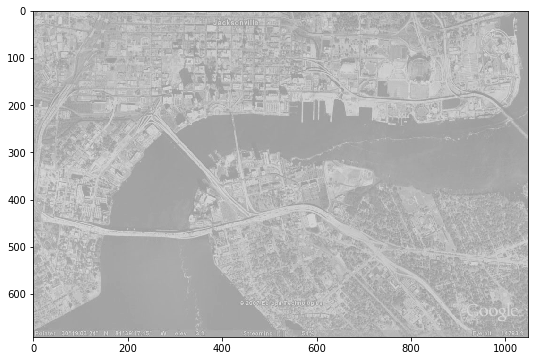

In [31]:
# Displaying an image using Matplotlib
plt.imshow(img, cmap='gray', vmin=0, vmax=1)

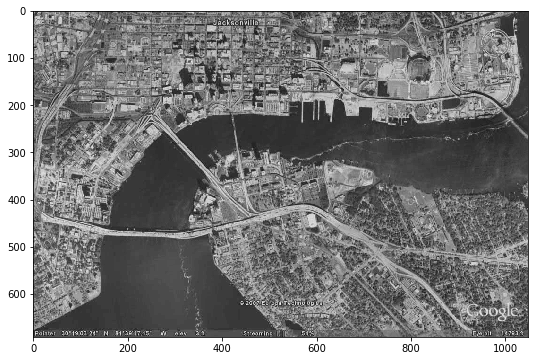

In [32]:
# Notice that the image is especially poor in contrast. Can we do something about it?

# Increase Contrast Range
pixel_min_value = img.min()
pixel_range = img.max() - img.min()
img_normalized = (img - pixel_min_value) / pixel_range
plt.imshow(img_normalized, cmap='gray', vmin=0, vmax=1)

In [33]:
# Basic inspection of normalized array

print(img_normalized.ndim)
print(img_normalized.shape)
print(img_normalized.max())
print(img_normalized.min())

2
(691, 1048)
1.0
0.0


(array([  3.67000000e+02,   5.24870000e+04,   1.93996000e+05,
          1.12430000e+05,   1.16621000e+05,   1.07837000e+05,
          8.60200000e+04,   4.75760000e+04,   6.74000000e+03,
          9.40000000e+01]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

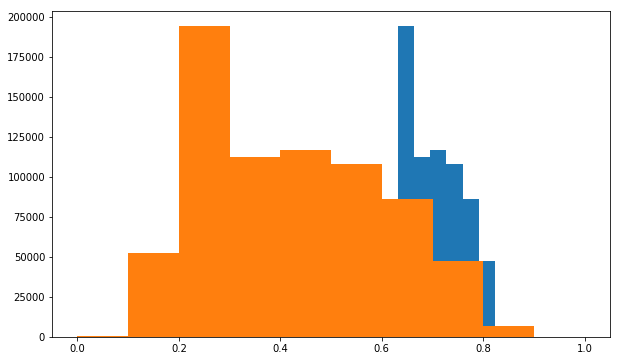

In [34]:
# Plot a histogram of the original and normalized images
img_values = img.flatten()
plt.hist(img_values)
img_normalized_values = img_normalized.flatten()
plt.hist(img_normalized_values)

# Can you make the plots 'see-through', and add a legend?

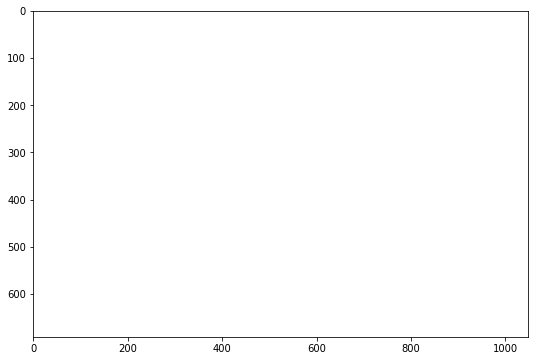

In [35]:
# All pixel values are between 0 and 1
# Is 0 Black and 1 white, or vice versa?
# Let's find out!

blank_image = np.ones(img.shape) * 1
plt.imshow(blank_image, cmap='gray', vmin=0, vmax=1)

In [37]:
# Color images - notice the shape of the resulting matrix, which is 3d instead of 2d
cezanne = mpimg.imread('images/cezanne.png')
print(cezanne.ndim)
print(cezanne.shape)
print(cezanne.max())
print(cezanne.min())
print(cezanne[:3])

3
(858, 1161, 3)
1.0
0.0
[[[ 0.58431375  0.50196081  0.27843139]
  [ 0.9254902   0.8392157   0.64313728]
  [ 0.81176472  0.72941178  0.54509807]
  ..., 
  [ 0.3764706   0.27843139  0.29411766]
  [ 0.33725491  0.23529412  0.28627452]
  [ 0.34117648  0.24705882  0.30980393]]

 [[ 0.71764708  0.63529414  0.42745098]
  [ 0.82745099  0.74509805  0.53725493]
  [ 0.63921571  0.56078434  0.36078432]
  ..., 
  [ 0.37254903  0.27450982  0.29019609]
  [ 0.34509805  0.24313726  0.29411766]
  [ 0.35686275  0.26666668  0.33725491]]

 [[ 0.73725492  0.64705884  0.44313726]
  [ 0.75294119  0.66274512  0.45882353]
  [ 0.60392159  0.51764709  0.32549021]
  ..., 
  [ 0.33725491  0.23921569  0.25490198]
  [ 0.36470589  0.26274511  0.3137255 ]
  [ 0.34901962  0.24313726  0.30980393]]]


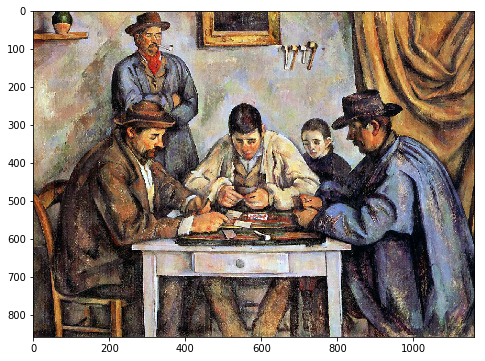

In [38]:
# Display the image
plt.imshow(cezanne)

(array([ 112505.,  154887.,  195141.,  129094.,   94188.,   88338.,
         105302.,   75793.,   31581.,    9309.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

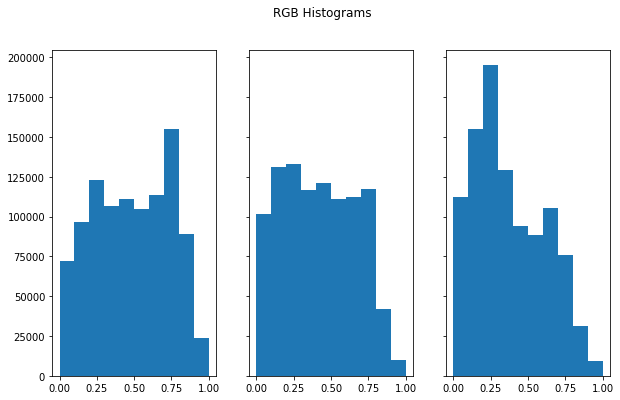

In [39]:
# Let's extract the Blue/Green/Red channel values of the image into separate numpy arrays
reds = cezanne[:, :, 0]
blues = cezanne[:, :, 1]
greens = cezanne[:, :, 2]

# We'll add 3 subplots to our figure
# With 1 row and 3 columns of subplots, and with a shared Y-axis
# We get back two things:
#     The figure object
#     A tuple of 'Axes' objects, each corresponding to an individual subplot
# So the axes object here has 3 axis inside it
f, axes = plt.subplots(1, 3, sharey=True)

# The 'Super Title' of the figure, common to all subplots
f.suptitle('RGB Histograms')

# For each of the axes, plot a histogram of the R/G/B channel values
axes[0].hist(reds.flatten())
axes[1].hist(blues.flatten())
axes[2].hist(greens.flatten())

# Can we change the color of the plots to correspond to the channel they represent?

(858, 1161, 3)


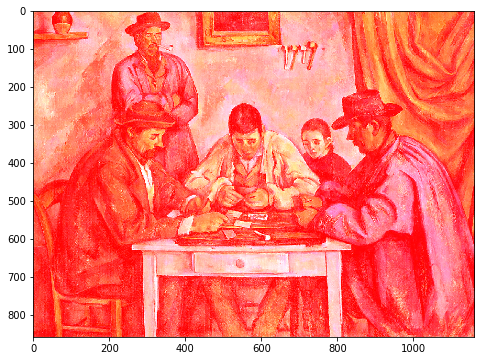

In [40]:
# Let's mess with the Red channel, and modify all values in the red channel to 1
reds = np.ones((cezanne.shape[0], cezanne.shape[1]))

# We use the 'dstack' method here to stack the 3 numpy arrays 'depth-wise'
# Notice that we also have 'hstack', and 'vstack' (horizontal-stacking and vertical-stacking respectively)
red_cezanne = np.dstack((reds, blues, greens))

# It's invaluable to look at the shape of the array at every point to ensure there are no surprises
print(red_cezanne.shape)
plt.imshow(red_cezanne)